In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from sklearn.model_selection import cross_val_score
from sklearn import svm


sns.set()

In [ ]:
df = pd.read_csv('data/responses.csv')
df = df.fillna(-1.0)
df.shape

(1010, 150)

Hobbies data

In [ ]:
HOBBIES_IDS = range(31,63)
hobbies_cols = df.columns[HOBBIES_IDS]
hobbies = df[hobbies_cols]
hobbies

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,5.0,4.0,5.0,2.0,1.0,1.0,5.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
1006,4.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,-1.0,1.0,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0
1007,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,4.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
1008,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,2.0,5.0,5.0,3.0,1.0,1.0,5.0,1.0,5.0,4.0,1.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


Demographics data

In [ ]:
DEMOGRAPHICS_IDS = range(143,150) # without age, weight and height
demographics_cols = df.columns[DEMOGRAPHICS_IDS]
demographics = df[demographics_cols]

gender_mapping = {'female': 0.0, 'male': 1.0}
left_right_handed_mapping = {'left handed': 0.0, 'right handed': 1.0}
education_mapping = {'currently a primary school pupil': 0.0, 'primary school': 1.0, 'secondary school': 2.0,
                     'college/bachelor degree': 3.0, 'masters degree': 4.0, 'doctorate degree': 5.0}
only_child_mapping = {'no': 0.0, 'yes': 1.0}
village_town_mapping = {'city': 0.0, 'village': 1.0}
house_block_of_flats_mapping = {'block of flats': 0.0, 'house/bungalow': 1.0}
demographics = demographics.replace(
    {'Gender': gender_mapping,
     'Left - right handed': left_right_handed_mapping,
     'Education': education_mapping,
     'Only child': only_child_mapping,
     'Village - town': village_town_mapping,
     'House - block of flats': house_block_of_flats_mapping})
demographics

,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1.0,0.0,1.0,3.0,0.0,1.0,0.0
1,2.0,0.0,1.0,3.0,0.0,0.0,0.0
2,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,1.0,0.0,1.0,3.0,1.0,0.0,1.0
4,1.0,0.0,1.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
1005,1.0,0.0,1.0,2.0,0.0,0.0,1.0
1006,5.0,1.0,0.0,4.0,0.0,1.0,1.0
1007,0.0,0.0,1.0,2.0,1.0,0.0,0.0
1008,1.0,0.0,1.0,3.0,0.0,0.0,0.0


K Means

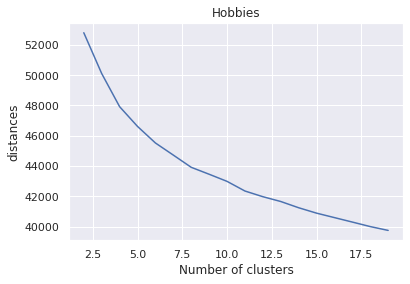

In [ ]:
distances_for_hobbies = [] # Sum of squared distances of samples to their closest cluster center
k_range = range(2,20)

for k in k_range:
  k_means_for_hobbies = KMeans(n_clusters=k)
  k_means_for_hobbies.fit(hobbies)
  distances_for_hobbies.append(k_means_for_hobbies.inertia_)

plt.plot(k_range, distances_for_hobbies)
plt.title('Hobbies')
plt.xlabel('Number of clusters')
plt.ylabel('distances')
plt.show()

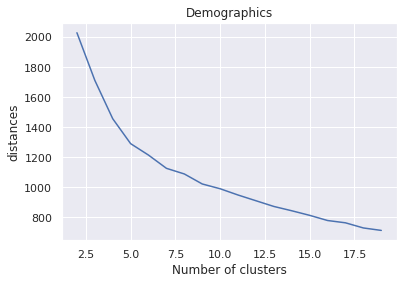

In [ ]:
distances_for_demographics = [] # Sum of squared distances of samples to their closest cluster center
k_range = range(2,20)

for k in k_range:
  k_means_for_demographics = KMeans(n_clusters=k)
  k_means_for_demographics.fit(demographics)
  distances_for_demographics.append(k_means_for_demographics.inertia_)

plt.plot(k_range, distances_for_demographics)
plt.title('Demographics')
plt.xlabel('Number of clusters')
plt.ylabel('distances')
plt.show()

We should choose the number of clusters which is optimal for the data.

In [ ]:
NUMBER_OF_CLUSTERS_FOR_HOBBIES = 15
NUMBER_OF_CLUSTERS_FOR_DEMOGRAPHICS = 10

In [ ]:
k_means_for_hobbies = KMeans(n_clusters=NUMBER_OF_CLUSTERS_FOR_HOBBIES)
cluster_predictions_based_on_hobbies = k_means_for_hobbies.fit_predict(hobbies)

In [ ]:
k_means_for_demographics = KMeans(n_clusters=NUMBER_OF_CLUSTERS_FOR_DEMOGRAPHICS)
cluster_predictions_based_on_demographics = k_means_for_demographics.fit_predict(demographics)

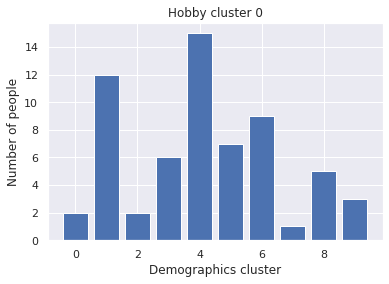

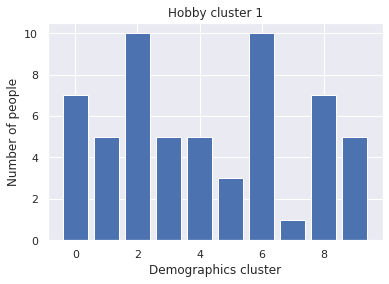

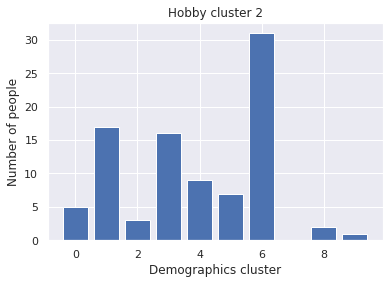

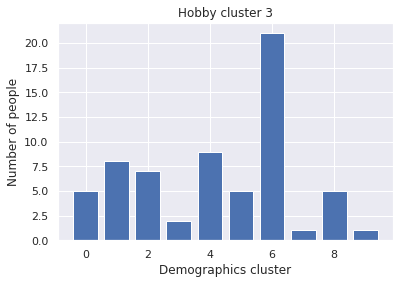

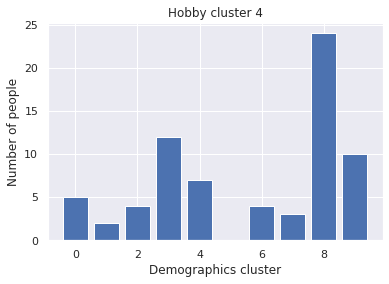

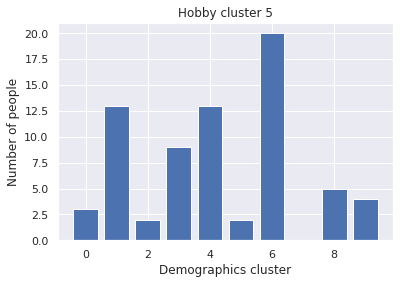

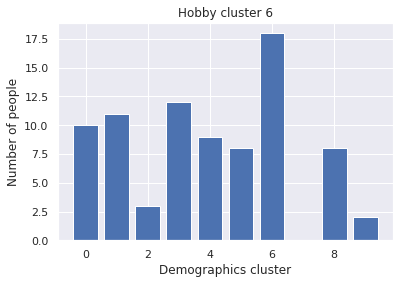

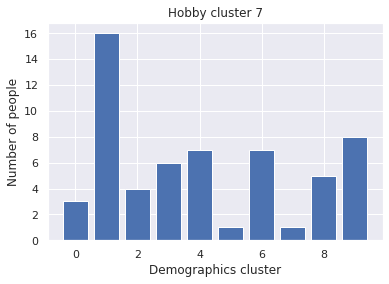

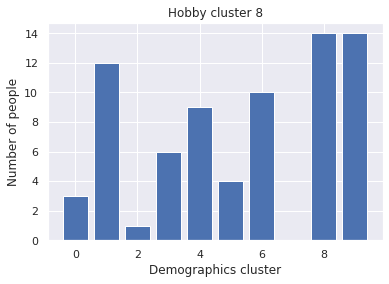

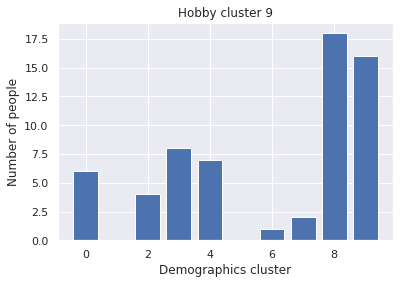

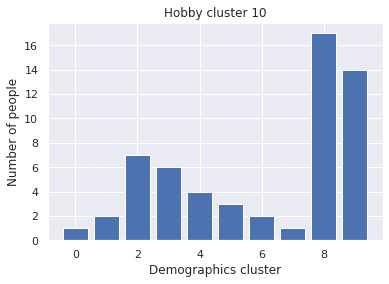

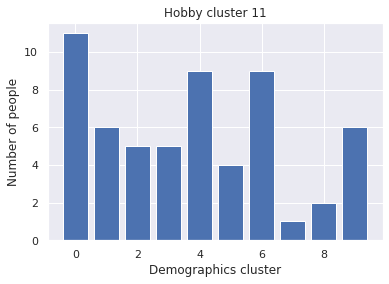

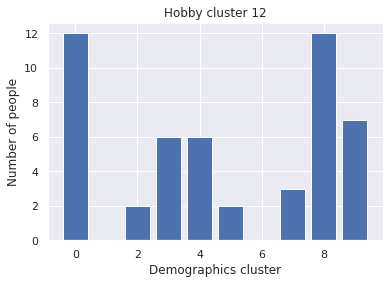

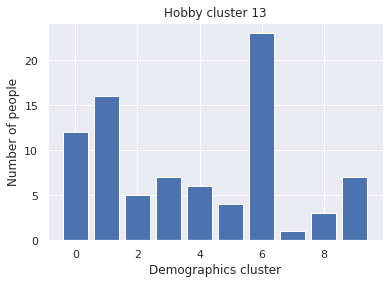

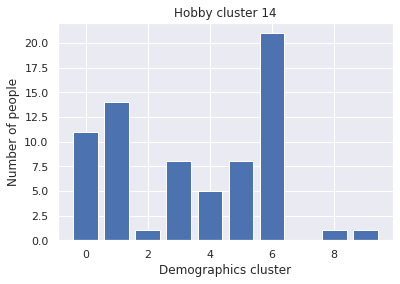

In [ ]:
demographics_based_on_hobbies = defaultdict(lambda: defaultdict(int))
for hobbies_cluster, demographics_cluster in zip(
    cluster_predictions_based_on_hobbies, cluster_predictions_based_on_demographics):
  demographics_based_on_hobbies[hobbies_cluster][demographics_cluster] += 1

for hobby_cluster, demographics_clusters in sorted(demographics_based_on_hobbies.items()):
  plt.ylabel('Number of people')
  plt.xlabel('Demographics cluster')
  plt.title('Hobby cluster ' + str(hobby_cluster))
  plt.bar(demographics_clusters.keys(), demographics_clusters.values(), align='center')
  plt.show()